In [1]:
import pandas as pd
import numpy as np

## Handling Missing Value
- Download dataset
- import ke file Python Notebook menggunakan Pandas DataFrame
- Identifikasi dan handle missing values di dataset ini.
- Cari juga data yang inconsistent dan invalid, lalu di remove.


<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

### `Gathering Data`

In [2]:
df = pd.read_csv('../../datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### `Assesing Data`

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
df.Cabin.nunique()

147

In [9]:
df.duplicated().sum()

0

## `Cleaning Data`

### `Remove Missing Values`

In [10]:
# df.dropna(inplace=True,axis=0)
# df['Age'] = df['Age'].dropna()
df.dropna(subset=['Age'], inplace=True)

In [11]:
df.dropna(subset=['Cabin'], inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [12]:
# df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode(), inplace=True)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  185 non-null    int64  
 1   Survived     185 non-null    int64  
 2   Pclass       185 non-null    int64  
 3   Name         185 non-null    object 
 4   Sex          185 non-null    object 
 5   Age          185 non-null    float64
 6   SibSp        185 non-null    int64  
 7   Parch        185 non-null    int64  
 8   Ticket       185 non-null    object 
 9   Fare         185 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     185 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.8+ KB


### `Convert Data Types`

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
df.Pclass.dtype

dtype('int64')

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [18]:
class_fare_df  = df[['Pclass','Ticket','Fare','Embarked']]
# anjay = class_fare_df[class_fare_df['Pclass'] == 1]
# # anjay.value_counts()
# class_fare_df.unique()

In [19]:
# Mengelompokkan berdasarkan Pclass dan menghitung statistik harga
price_summary = class_fare_df.groupby('Pclass')['Fare'].describe()
print(price_summary)

        count       mean        std    min      25%       50%        75%  \
Pclass                                                                     
1       160.0  88.574688  77.030980   0.00  37.7500  73.26665  107.04375   
2        15.0  18.444447  10.141895  10.50  11.6875  13.00000   26.00000   
3        10.0  11.027500   3.531942   7.65   7.7500  10.46250   12.47500   

             max  
Pclass            
1       512.3292  
2        39.0000  
3        16.7000  


In [20]:
df.Pclass = df.Pclass.astype('category')

In [21]:
df.Sex = df.Sex.astype('category')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  185 non-null    int64   
 1   Survived     185 non-null    int64   
 2   Pclass       185 non-null    category
 3   Name         185 non-null    object  
 4   Sex          185 non-null    category
 5   Age          185 non-null    float64 
 6   SibSp        185 non-null    int64   
 7   Parch        185 non-null    int64   
 8   Ticket       185 non-null    object  
 9   Fare         185 non-null    float64 
 10  Cabin        185 non-null    object  
 11  Embarked     185 non-null    object  
dtypes: category(2), float64(2), int64(4), object(4)
memory usage: 16.5+ KB


### `Handle Outiers`

In [23]:
Q1 = df.Fare.quantile(0.25)
Q3 = df.Fare.quantile(0.75)
IQR = Q3 - Q1

In [24]:
df_filter = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 *IQR)]

<Axes: >

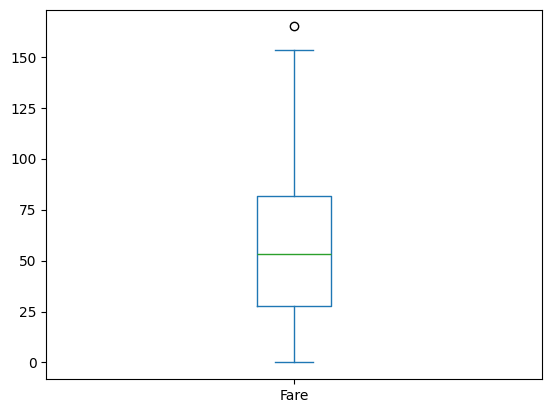

In [25]:
df_filter['Fare'].plot(kind='box')

####  Not handling Ouliers data['Fare']

<Axes: >

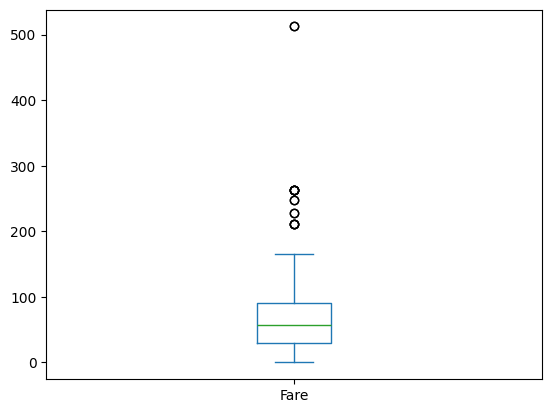

In [26]:
df['Fare'].plot(kind='box')

### `Normalizing Data`

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaller = MinMaxScaler()

df[['Fare']] = scaller.fit_transform(df[['Fare']])


print(df[['Fare']])

         Fare
1    0.139136
3    0.103644
6    0.101229
10   0.032596
11   0.051822
..        ...
871  0.102579
872  0.009759
879  0.162314
887  0.058556
889  0.058556

[185 rows x 1 columns]
